In [2]:
# POPULATION ANALYSIS - NAIVE population analysis, regulation!

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import warnings
from scipy.cluster.hierarchy import linkage, leaves_list
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 
warnings.filterwarnings("ignore", category= DeprecationWarning)
warnings.filterwarnings("ignore", category= UserWarning)


#paths
savefigpath  =  r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw'
#'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'



Env: clapfcstimulation


Stats for Sensory
KS test for Visual and Visual + Opto is 0.23084227518754155 and p: 3.5903639534268115e-243
Pearson correlation coefficient for Visual and Visual + Opto is -0.8755213107961244 and p: 0.0 
6.329003914375037e-153
Stats for Opto-boosted
KS test for Visual and Visual + Opto is 0.3032289002557545 and p: 2.111603439056274e-250
Pearson correlation coefficient for Visual and Visual + Opto is -0.8513430755237846 and p: 0.0 
1.1558963766645237e-78
Stats for Opto
KS test for Visual and Visual + Opto is 0.032028156621205506 and p: 0.1921760117929901
Pearson correlation coefficient for Visual and Visual + Opto is -0.7349772724505239 and p: 0.0 
2.333220379193448e-131
$\Delta$ Absolute magnitude - Total animal number for 13
[2.6414077688708266e-09, 7.714298537967991e-10]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ ECDF Shift - Total animal number for 13
[3.5527350794921018e-06, 6.304669687276922e-07]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$\Delta$ CV - Total animal number for 13
[0.1686227563075517, 0.002197759855876457]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


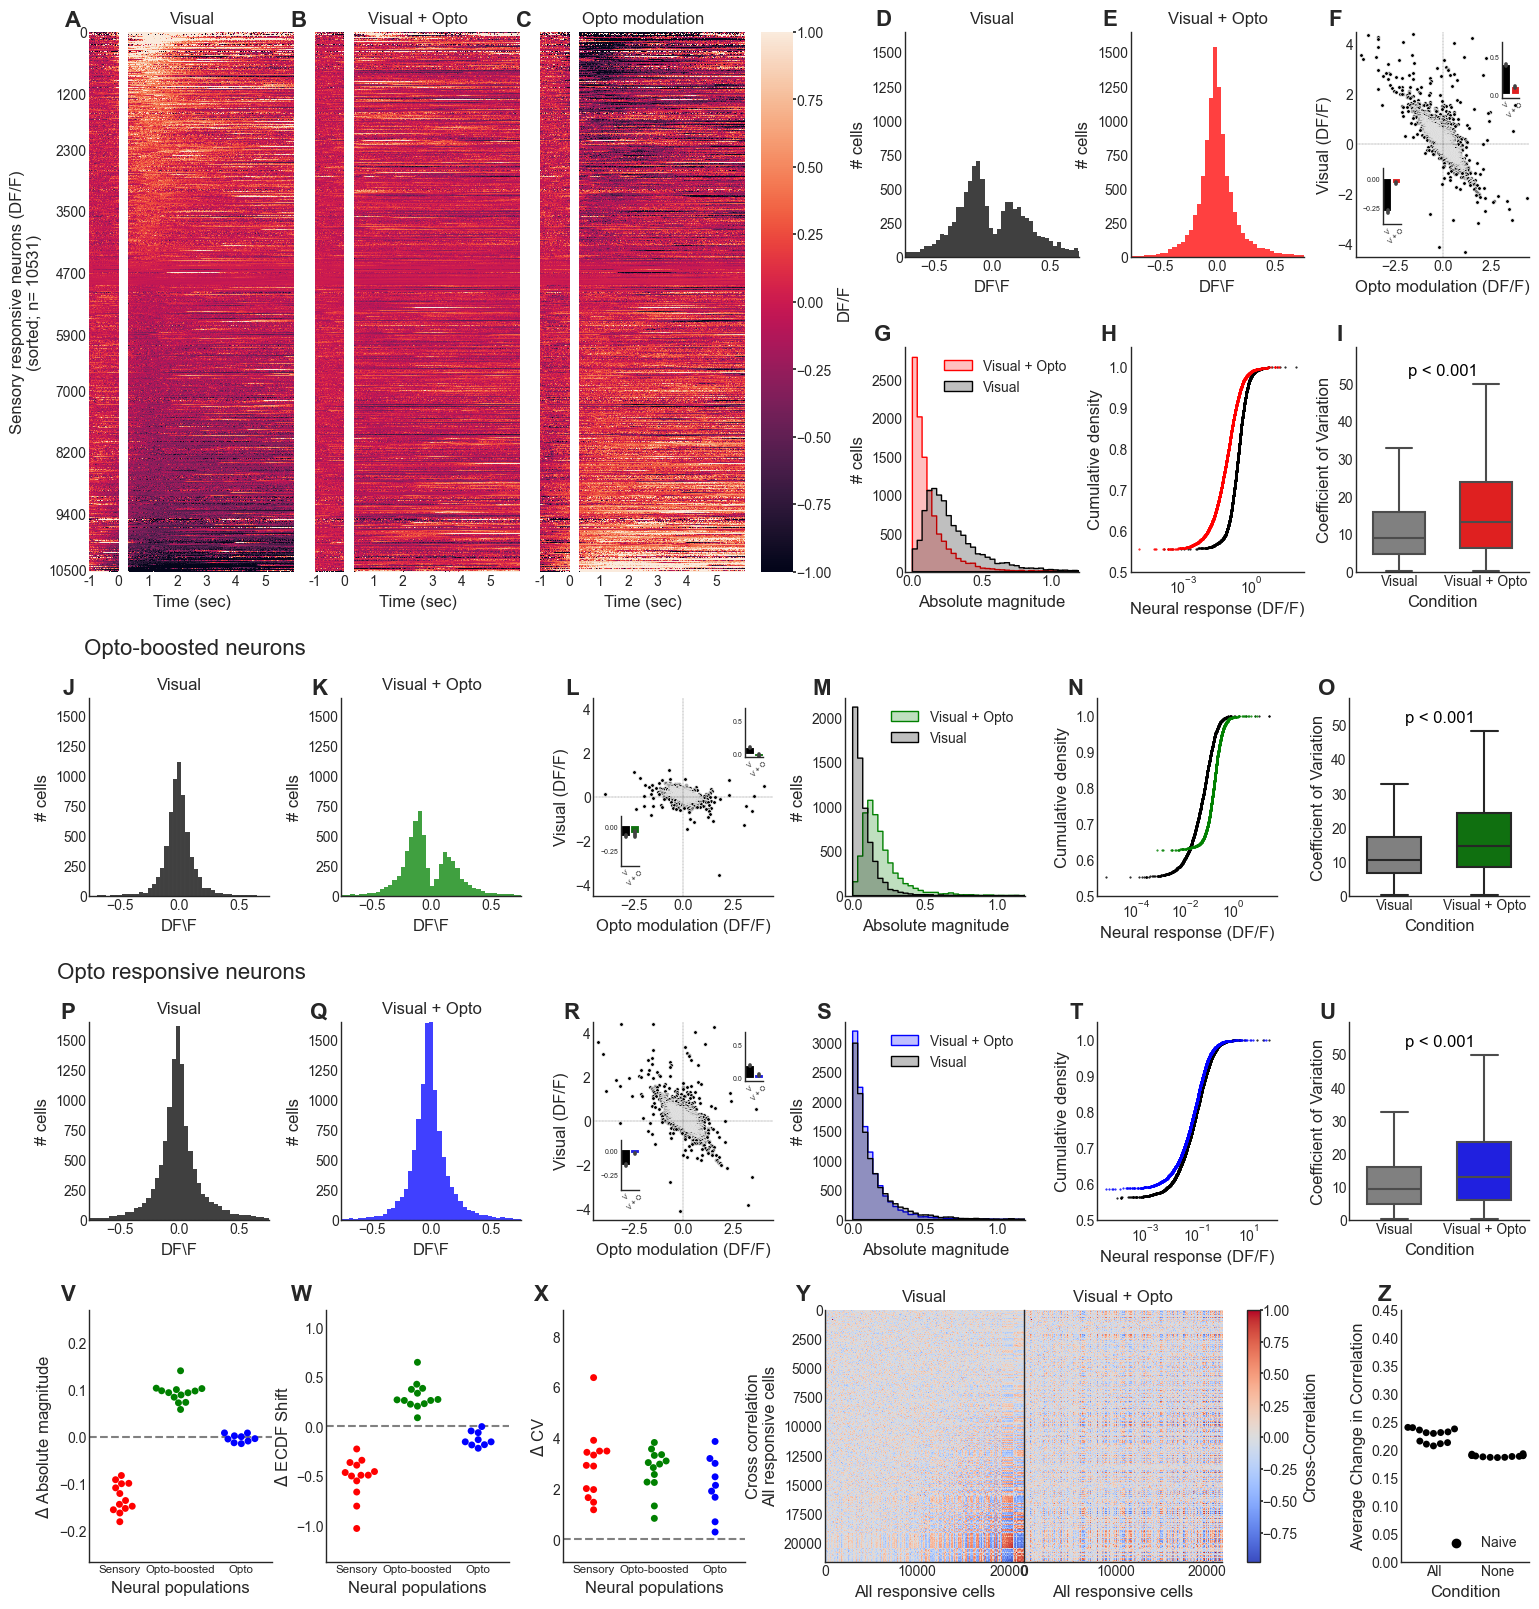

In [4]:
# Figure 2 : Chrimson mice - Naive population analysis

interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Naive'

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 18)) # 8,11 for full A4 page

# set gridspec

gs_visHeatmap  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.65, top=0.95, left=0.05,right=0.46,
                              wspace=0.1, hspace=0.2)
gs_visHeatmapCax  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.65, top=0.95, left=0.48, right=0.50,
                              wspace=0.2, hspace=0.4)
gs_visuaPlots  = fig.add_gridspec(ncols=3, nrows=2, bottom=0.65, top=0.95, left=0.56, right=0.95,
                              wspace=0.3, hspace=0.4)
gs_bothPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.47, top=0.58, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_optoPlots   = fig.add_gridspec(ncols=6, nrows=1, bottom=0.29, top=0.40, left=0.05, right=0.95,
                              wspace=0.4, hspace=0.2)
gs_Summary     = fig.add_gridspec(ncols=3, nrows=1, bottom=0.10, top=0.24, left=0.05, right=0.46, 
                              wspace=0.3, hspace=0.1)
gs_correlation = fig.add_gridspec(ncols=2, nrows=1, bottom=0.10, top=0.24, left=0.51, right=0.82, 
                              wspace=0, hspace=0.1)
gs_correlationMean = fig.add_gridspec(ncols=1, nrows=1, bottom=0.10, top=0.24, left=0.87, right=0.95, 
                              wspace=0.4, hspace=0.1)


# Panel A: Heatmap for Visual responsive cells
ax_gs_visHeatmap = {xx: fig.add_subplot(gs_visHeatmap[xx]) for xx in range(3)}
cax =  {xx: fig.add_subplot(gs_visHeatmapCax[xx]) for xx in range(1)} 
colorbarlimitsForHeatMap = [-1,1] 
pfun.heatmap_comparison('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel= interestedTrainedLevel, condition='Sensory',
                       colormapSelection = 'OptoProject', axis=ax_gs_visHeatmap, cbar_ax=cax[0], 
                       savefigname=None, savefigpath=None, colorbarlimits=colorbarlimitsForHeatMap)

# Panel B-G: Visual responsive cells analysis
plotParams = {
    'ylimitsforhist': [0, 1650],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.5, 1.05],
    'xlimitsforABS': [-0.05, 1.2],
    'ylimitsforCV': [0.1, 0.15],
    'faceColors': ['black','red'],
     }

total_num_axis = gs_visuaPlots.get_geometry()[0]* gs_visuaPlots.get_geometry()[1]
ax_gs_visuaPlots = {xx: fig.add_subplot(gs_visuaPlots[xx]) for xx in range(total_num_axis)}
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Sensory', plotParams = plotParams,
                       axisAll=ax_gs_visuaPlots, savefigname=None, savefigpath=None)

# Panel H-M: OptoBoosted responsive cells analysis
total_num_axis = gs_bothPlots.get_geometry()[0]* gs_bothPlots.get_geometry()[1]
ax_gs_bothPlots = {xx: fig.add_subplot(gs_bothPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'green']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto-boosted', plotParams = plotParams,
                       axisAll=ax_gs_bothPlots, savefigname=None, savefigpath=None)

# Panel N-S: Opto responsive cells analysis
total_num_axis = gs_optoPlots.get_geometry()[0]* gs_optoPlots.get_geometry()[1]
ax_gs_optoPlots = {xx: fig.add_subplot(gs_optoPlots[xx]) for xx in range(total_num_axis)}
plotParams['faceColors'] = ['black', 'blue']
pfun.population_plots('Visual', 'Visual + Opto', sortType = 'Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, condition='Opto', plotParams = plotParams,
                       axisAll=ax_gs_optoPlots, savefigname=None, savefigpath=None)

# Panel T: SNR/CV summary results
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], [interestedTrainedLevel], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('ECDF Shift',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[1], savefigname=None, savefigpath=None)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], [interestedTrainedLevel], ax = ax_gs_Summary[2], savefigname=None, savefigpath=None)


# Panel T: Correlation matrix
total_num_axis = gs_correlation.get_geometry()[0]* gs_correlation.get_geometry()[1]
ax_gs_correlation = {xx: fig.add_subplot(gs_correlation[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix('Visual', cohort=interestedCohort, 
                       trainedLevel=interestedTrainedLevel, responsiveness='All',
                       axs=[ax_gs_correlation[0],ax_gs_correlation[1]] ,savefigname=None, savefigpath=None)

total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
pfun.plot_correlationMatrix_meanChange( ['Naive'], cohort=interestedCohort, 
                       responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_visHeatmap, ax_gs_visuaPlots, ax_gs_bothPlots, ax_gs_optoPlots,ax_gs_Summary,ax_gs_correlation,ax_gs_correlationMean]
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',
          'Q','R','S','T','U','V','W','X','Y','','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

# Add some text in the figure        
axes[2][0].text(1.2, 1.3, 'Opto-boosted neurons', transform=axes[2][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

axes[3][0].text(1.2, 1.3, 'Opto responsive neurons', transform=axes[3][0].transAxes, fontsize=16, 
                        fontweight='normal', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

        
plt.tight_layout()
savefigname = 'Figure2_Chrimson_NaivePopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()
